In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

In [3]:
df = pd.read_csv("train.csv")
df = df.values

In [7]:
Y = df[:,0]
print(Y)

[1 0 1 ... 7 6 9]


In [8]:
X = df[:,1:]

In [25]:
split = int(0.8*X.shape[0])

In [28]:
X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split]
Y_test = Y[split:]


In [14]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

In [9]:
def calDistance(X, query_point):
    distance = np.sqrt(((query_point-X)**2).sum())
    return distance


def KNN(X, Y,query_point, k=5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = calDistance(X[i],query_point)
        vals.append((d,Y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts = True)
    #print(new_vals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return int(pred)
    

In [30]:
def get_accu(X_train, Y_train, X_test, Y_test):
    pred = []
    m = X_test.shape[0]
    for i in range(m):
        p = KNN(X_train,Y_train,X_test[i])
        pred.append(p)
    return (pred==Y_test).sum()/m

5


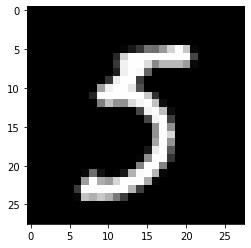

In [36]:
x = KNN(X_train, Y_train, X_test[100])
print(x)
drawImg(X_test[100])

In [37]:
accuracy = get_accu(X_train, Y_train, X_test, Y_test)
print(accuracy)

KeyboardInterrupt: 

In [40]:
img = mpimg.imread("tt7.jpg")

In [41]:
drawImg(img)

ValueError: cannot reshape array of size 482022 into shape (28,28)

In [42]:
width, height = img.size

TypeError: cannot unpack non-iterable int object

In [44]:
from PIL import Image

In [151]:
img = Image.open("1tt.jpg")

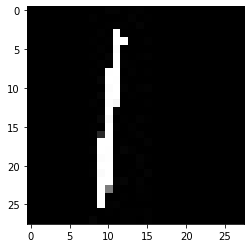

In [152]:
plt.imshow(img)

In [153]:
img = np.array(img)

In [154]:
print(img.shape)

(28, 28, 3)


In [155]:
img = img[:,:,0]

In [156]:
print(img.shape)

(28, 28)


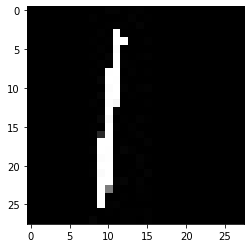

In [157]:
plt.imshow(img,cmap='gray')

In [158]:
img = img.reshape((784,))

In [159]:
print(img.shape)

(784,)


In [160]:
a = KNN(X_train, Y_train,img)

In [161]:
print(a)

4
